In [1]:
# using N-grams feature for capture contextual information from reviews...

import pandas as pd
import nltk
from nltk.util import ngrams
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re

# Set the file path to your dataset
file_path = r'C:\Users\nh013\Desktop\amazaon dataset\amazon_reviews.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Remove any rows with missing values
df.dropna(inplace=True)

# Remove any duplicate rows
df.drop_duplicates(inplace=True)

# Remove any URLs
df['reviewText'] = df['reviewText'].apply(lambda x: re.sub(r'http\S+', '', x))

# Remove any special characters
df['reviewText'] = df['reviewText'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Convert all text to lowercase
df['reviewText'] = df['reviewText'].apply(lambda x: x.lower())

# Remove stop words
stop_words = set(stopwords.words('english'))
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Apply stemming
stemmer = PorterStemmer()
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# Perform sentiment analysis using VADER
sia = SentimentIntensityAnalyzer()

# Function to generate N-grams
def generate_ngrams(text, n):
    tokenized_text = word_tokenize(text)
    ngrams_list = list(ngrams(tokenized_text, n))
    return [' '.join(grams) for grams in ngrams_list]

# Add N-grams as a new column
df['ngrams'] = df['reviewText'].apply(lambda x: generate_ngrams(x, n=2))  # Change n as desired (e.g., n=2 for bigrams)

# Perform sentiment analysis on N-grams
for index, row in df.iterrows():
    review = row['reviewText']
    ngrams_list = row['ngrams']
    sentiment_scores = sia.polarity_scores(review)
    
    print("Reviewer Name:", row['reviewerName'])
    print("Review Text:", review)
    print("Sentiment Score:", sentiment_scores['compound'])
    print("N-grams:", ngrams_list)
    print()


Reviewer Name: 0mie
Review Text: purchas devic work advertis never much phone memori sinc download lot stuff brainer
Sentiment Score: 0.0
N-grams: ['purchas devic', 'devic work', 'work advertis', 'advertis never', 'never much', 'much phone', 'phone memori', 'memori sinc', 'sinc download', 'download lot', 'lot stuff', 'stuff brainer']

Reviewer Name: 1K3
Review Text: work expect sprung higher capac think made bit cheesier earlier version paint look clean
Sentiment Score: 0.4019
N-grams: ['work expect', 'expect sprung', 'sprung higher', 'higher capac', 'capac think', 'think made', 'made bit', 'bit cheesier', 'cheesier earlier', 'earlier version', 'version paint', 'paint look', 'look clean']

Reviewer Name: 1m2
Review Text: think work greathad diff bran 64gb card went south 3 monthsthi one held pretti well sinc s3 note3 updat 32114ive month zero issu sinc transfer s3 note3 note2 card reliabl solidch
Sentiment Score: 0.2732
N-grams: ['think work', 'work greathad', 'greathad diff', 'diff br

Reviewer Name: 0mie
Review Text: purchas devic work advertis never much phone memori sinc download lot stuff brainer
Sentiment Score: 0.0

Reviewer Name: 1K3
Review Text: work expect sprung higher capac think made bit cheesier earlier version paint look clean
Sentiment Score: 0.4019

Reviewer Name: 1m2
Review Text: think work greathad diff bran 64gb card went south 3 monthsthi one held pretti well sinc s3 note3 updat 32114ive month zero issu sinc transfer s3 note3 note2 card reliabl solidch
Sentiment Score: 0.2732

Reviewer Name: 2&amp;1/2Men
Review Text: bought retail packag arriv legit orang envelop english version asian like pictur show arriv quickli bought 32 16 retail packag htc one sv lg optimu card work order probabl best price youll get nice sd card
Sentiment Score: 0.8591

Reviewer Name: 2Cents!
Review Text: mini storag doesnt anyth els suppos purchas add addit storag microsoft surfac pro tablet come 64 128 gb suppos sandisk long stand reput speak
Sentiment Score: 0.0

Reviewe

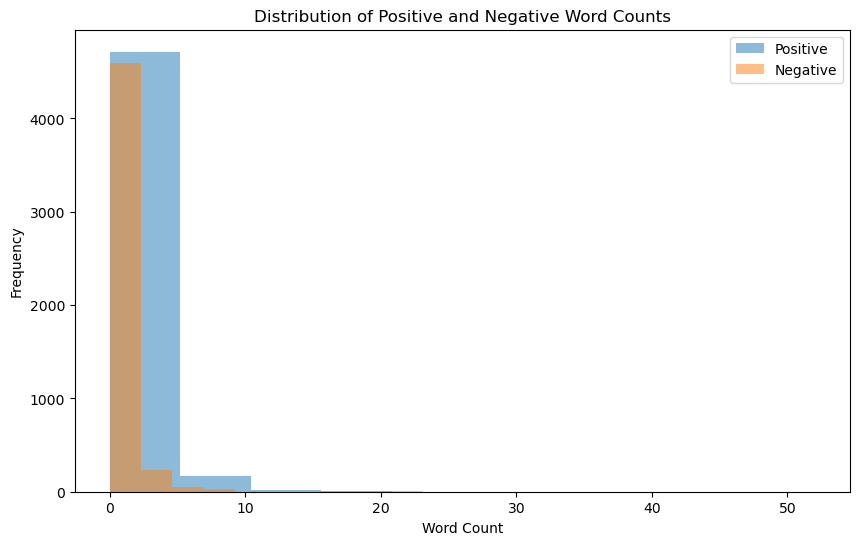

      Unnamed: 0  reviewerName  overall  \
1              1          0mie      5.0   
2              2           1K3      4.0   
3              3           1m2      5.0   
4              4  2&amp;1/2Men      5.0   
5              5       2Cents!      5.0   
...          ...           ...      ...   
4910        4910        ZM "J"      1.0   
4911        4911            Zo      5.0   
4912        4912     Z S Liske      5.0   
4913        4913      Z Taylor      5.0   
4914        4914           Zza      5.0   

                                             reviewText  reviewTime  day_diff  \
1     purchas devic work advertis never much phone m...  2013-10-25       409   
2     work expect sprung higher capac think made bit...  2012-12-23       715   
3     think work greathad diff bran 64gb card went s...  2013-11-21       382   
4     bought retail packag arriv legit orang envelop...  2013-07-13       513   
5     mini storag doesnt anyth els suppos purchas ad...  2013-04-29       588 

In [5]:
# perform positive and negative word count in each review using sentiment lexicons

import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt

# Set the file path to your dataset
file_path = r'C:\Users\nh013\Desktop\amazaon dataset\amazon_reviews.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Remove any rows with missing values
df.dropna(inplace=True)

# Remove any duplicate rows
df.drop_duplicates(inplace=True)

# Remove any URLs
df['reviewText'] = df['reviewText'].apply(lambda x: re.sub(r'http\S+', '', x))

# Remove any special characters
df['reviewText'] = df['reviewText'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Convert all text to lowercase
df['reviewText'] = df['reviewText'].apply(lambda x: x.lower())

# Remove stop words
stop_words = set(stopwords.words('english'))
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Apply stemming
stemmer = PorterStemmer()
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Positive and Negative word counts
positive_count = []
negative_count = []

# Perform sentiment analysis using VADER
for index, row in df.iterrows():
    review = row['reviewText']
    sentiment_scores = sia.polarity_scores(review)
    positive_count.append(sum([1 for word in review.split() if word in sia.lexicon and sia.lexicon[word] > 0]))
    negative_count.append(sum([1 for word in review.split() if word in sia.lexicon and sia.lexicon[word] < 0]))
    
    print("Reviewer Name:", row['reviewerName'])
    print("Review Text:", review)
    print("Sentiment Score:", sentiment_scores['compound'])
    print()

# Add positive and negative word count columns to the DataFrame
df['Positive Word Count'] = positive_count
df['Negative Word Count'] = negative_count


# Plot the word counts
plt.figure(figsize=(10, 6))
plt.hist(df['Positive Word Count'], bins=10, alpha=0.5, label='Positive')
plt.hist(df['Negative Word Count'], bins=10, alpha=0.5, label='Negative')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Positive and Negative Word Counts')
plt.legend()
plt.show()


# Print the updated DataFrame
print(df)


In [6]:
# Add sentiment polarity IN N-grams feature

import pandas as pd
import nltk
from nltk.util import ngrams
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re

# Set the file path to your dataset
file_path = r'C:\Users\nh013\Desktop\amazaon dataset\amazon_reviews.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Remove any rows with missing values
df.dropna(inplace=True)

# Remove any duplicate rows
df.drop_duplicates(inplace=True)

# Remove any URLs
df['reviewText'] = df['reviewText'].apply(lambda x: re.sub(r'http\S+', '', x))

# Remove any special characters
df['reviewText'] = df['reviewText'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Convert all text to lowercase
df['reviewText'] = df['reviewText'].apply(lambda x: x.lower())

# Remove stop words
stop_words = set(stopwords.words('english'))
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Apply stemming
stemmer = PorterStemmer()
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# Perform sentiment analysis using VADER
sia = SentimentIntensityAnalyzer()

# Function to generate N-grams
def generate_ngrams(text, n):
    tokenized_text = word_tokenize(text)
    ngrams_list = list(ngrams(tokenized_text, n))
    return [' '.join(grams) for grams in ngrams_list]

# Add N-grams and sentiment polarity as new columns
n = 2  # Set n as desired (e.g., n=2 for bigrams)
df['ngrams'] = df['reviewText'].apply(lambda x: generate_ngrams(x, n=n))
df['sentiment_polarity'] = df['reviewText'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Print the N-grams and sentiment polarity
for index, row in df.iterrows():
    ngrams_list = row['ngrams']
    sentiment_polarity = row['sentiment_polarity']
  
    print("N-grams:", ngrams_list)
    print("Sentiment Polarity:", sentiment_polarity)
    print()


N-grams: ['purchas devic', 'devic work', 'work advertis', 'advertis never', 'never much', 'much phone', 'phone memori', 'memori sinc', 'sinc download', 'download lot', 'lot stuff', 'stuff brainer']
Sentiment Polarity: 0.0

N-grams: ['work expect', 'expect sprung', 'sprung higher', 'higher capac', 'capac think', 'think made', 'made bit', 'bit cheesier', 'cheesier earlier', 'earlier version', 'version paint', 'paint look', 'look clean']
Sentiment Polarity: 0.4019

N-grams: ['think work', 'work greathad', 'greathad diff', 'diff bran', 'bran 64gb', '64gb card', 'card went', 'went south', 'south 3', '3 monthsthi', 'monthsthi one', 'one held', 'held pretti', 'pretti well', 'well sinc', 'sinc s3', 's3 note3', 'note3 updat', 'updat 32114ive', '32114ive month', 'month zero', 'zero issu', 'issu sinc', 'sinc transfer', 'transfer s3', 's3 note3', 'note3 note2', 'note2 card', 'card reliabl', 'reliabl solidch']
Sentiment Polarity: 0.2732

N-grams: ['bought retail', 'retail packag', 'packag arriv', '